In [1]:

import matplotlib.pyplot as plt
%matplotlib notebook



from pyipn import copy_template, Universe

# Start up

We first want to copy the template configuration to our local director so that we can edit it.


In [2]:
copy_template()

We can see how the config looks.

In [7]:
!cat template_config.yaml

## Specify the GRB parameters

grb:

  # Location and distance (degrees and Mpc)
  ra: 10.
  dec: 30.
  distance: .1

  # lightcurve
  K: 50. # intensity
  t_rise: 1. # rise time
  t_decay: 2. # decay time


# specify the detectors
# each entry is treated as the name of the detector
detectors:

  # name the detector
  det1:

    # it's location in GCRS
    ra: 50.
    dec: 80.
    altitude: 500. # km
    time: '2010-01-01T00:00:00' # time of detection

    # Where the detector point in the sky
    pointing:
      ra: 10.
      dec: 30.

    # the total effective area
    effective_area: 1.


  # add more detectors!
  
  det2:

    ra: 25.
    dec: -20.
    altitude: 1500.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 10.
      dec: 30.

    effective_area: 1.

    
  
    


# Make a Universe and blow up a GRB

We can load the configuration from the yaml file.

In [15]:
uni = Universe.from_yaml('template_config.yaml')

Set how long before and after the trigger time that you would like the light curve to last and create the data.

In [16]:
uni.explode_grb(tstart=-50,tstop=50)

<IPython.core.display.Javascript object>


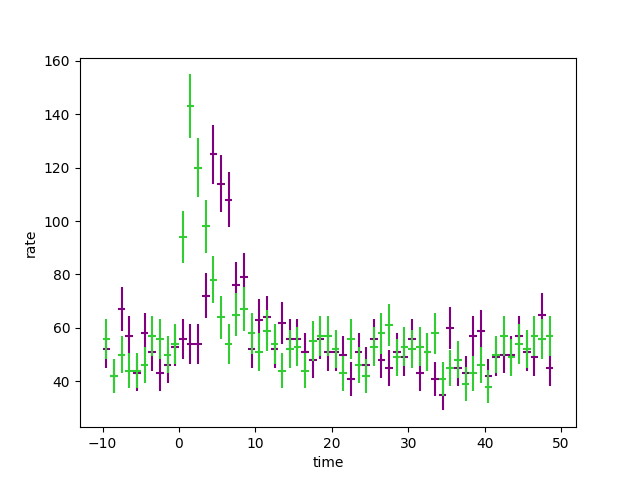

In [19]:

fig, ax = plt.subplots()

colors = ['purple', 'limegreen']

for i, (det, lc) in enumerate(uni.light_curves.items()):
    
    lc.display(-10,50,1., ax=ax, color = colors[i])
    

We can now view the light curves.

In [14]:
uni._time_differences

array([ 0.       , 30.7725592])